<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Kmeans/Resolu%C3%A7%C3%A3o_Kmeans_exerc%C3%ADcio_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Importe as bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Exercício

Neste exercício, usaremos um dataset contendo informações sobre as preferências do cliente. Veremos quanto cada cliente gasta em um ano em cada subcategoria do supermercado e tentaremos encontrar semelhanças usando clusterização.

A origem do dataset é [essa](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [71]:
# carregue os dados

df = pd.read_csv('/content/Wholesale customers data.csv')

In [72]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore o dataset com as técnicas matemáticas e de visualização que aprendemos. O que você encontrou?

Checklist:

* O que significa cada coluna?
* Algum dado categórico para converter?
* Algum dado faltante(NaN) para remover?
* Colinearidade da coluna - alguma correlação alta?
* Estatísticas descritivas - existem outliers a serem removidos?
* Distribuição de dados em colunas - a distribuição é assimétrica?
*etc

In [63]:
# seu código aqui
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [64]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
# suas observações

In [73]:
df.Channel.value_counts() 

1    298
2    142
Name: Channel, dtype: int64

In [74]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [67]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [68]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Limpeza de Dados

Se sua conclusão do desafio anterior for que os dados precisam de limpeza/transformação, faça isso nas células abaixo. No entanto, se sua conclusão for que os dados não precisam ser limpos ou transformados, sinta-se à vontade para pular esse desafio. Mas se você escolher o último, forneça uma justificativa.

In [75]:
# seu código aqui
df.drop(columns=['Channel', 'Region'], inplace=True)


df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# suas observações

# Pré-processamento de dados

Um problema com o dataset é que os valores são muito diferentes em várias categorias (por exemplo, `Fresh` e `Grocery` em comparação com `Detergents_Paper` e `Delicassen`).

Valores em escalas diferentes nas variáveis podem causar problemas em nosso clustering. 

Estandardize seus dados na célula a seguir:

In [76]:
from sklearn.preprocessing import StandardScaler

# seu código aqui:

scaler = StandardScaler().fit(df)

X_std = scaler.transform(df)


**Depois de estandardizar seus dados, atribua os dados transformados a uma nova variável.**

# Clusterização com K-Means

Aplique o método de clusterização K-means no seu dataset. 

Após treinar seu modelo, armazene o resultado em uma nova coluna do seu dataframe.

In [86]:
# Seu código aqui
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(X_std)

KMeans(n_clusters=5)

In [87]:
kmeans.labels_

array([4, 0, 0, 4, 2, 4, 4, 4, 4, 0, 0, 4, 2, 0, 0, 4, 0, 4, 4, 4, 4, 4,
       2, 0, 0, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 0, 2, 0, 0, 2, 2, 4, 0, 0,
       0, 0, 0, 1, 0, 0, 4, 4, 2, 0, 4, 4, 1, 0, 4, 4, 4, 1, 4, 0, 4, 1,
       4, 0, 4, 4, 2, 2, 4, 2, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 1, 1, 2,
       4, 2, 4, 4, 1, 2, 0, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 4, 0, 0, 4, 0,
       4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       2, 4, 4, 4, 4, 2, 0, 3, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 2, 2, 0,
       4, 4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 1, 4, 4, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 1, 4, 2, 0, 2, 4, 4, 2, 2, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,

In [88]:
df['labels'] = kmeans.labels_

In [89]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,2


In [82]:
df.groupby('labels')['Fresh'].mean()

labels
0    13599.164557
1     5591.436364
2    24847.750000
3    34782.000000
Name: Fresh, dtype: float64

# Desafio (Bônus) - Mudando o número clusters

O grande desafio do algoritmo Kmeans é saber qual número fornecer ao parâmetro `n_clusters`.

No aprendizado de máquina avançado, os cientistas de dados experimentam diferentes números de clusters e avaliam os resultados com medidas estatísticas (leia [aqui](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). 

Não estamos usando medidas estatísticas hoje, mas podemos usar uma forma visual. Aplique o método do cotovelo e teste valores de `n_clusters` no seu modelo.

In [83]:
# Your code here
from yellowbrick.cluster import KElbowVisualizer

In [84]:
model = KMeans()

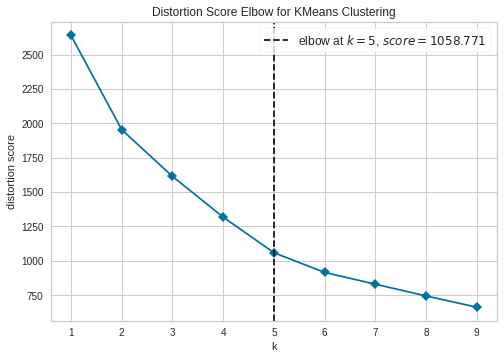

In [85]:
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)

visualizer.fit(X)        # Fit os dados para o visualizer

visualizer.show()